# Feature Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import classic_features as cf
import non_classic_features as ncf

In [3]:
from scipy.stats import spearmanr

Read the train set, use functions from `classic_features.py` to create all classic features, and functions from `non_classic_features.py` to create all non-classic features.

Since creation of features takes some time, the first time all features are created, save it into a CSV file.

In [4]:
# UNCOMMENT to create all features

#df = pd.read_csv("../data/weebit_train.csv", index_col = 0)
#df['Text'] = df['Text'].astype(str)

# classic features
#df = cf.words_and_sentences(df)
#df = cf.syllables(df)
#df = cf.difficult_words_pct(df)
#df = cf.polysyllables(df)
#df = cf.complex_words_pct(df)
#df = cf.long_sent_pct(df)
#df = cf.long_word_pct(df)
#df = cf.avg_letters_per_word(df)
#df = cf.comma_pct(df)
#df = cf.pos_features(df)
#df = cf.remove_aux_features(df)

# non-classic features
#df = ncf.parse_tree_features(df)

#df.to_csv("weebit_train_with_features.csv", encoding='utf-8')

In [5]:
df = pd.read_csv("weebit_train_with_features.csv", index_col=0)

## 1. Classic features

Classic features are used by the traditional readability formulas.

### 1.1. Average number of words per sentence

Let's try to analyse the average number of words per sentence. This feature is used by almost all traditional formulas. It should correlate with readability level.

In [6]:
print(spearmanr(df['Level'], df['Avg_words_per_sentence'])[0])

0.3407909540703358


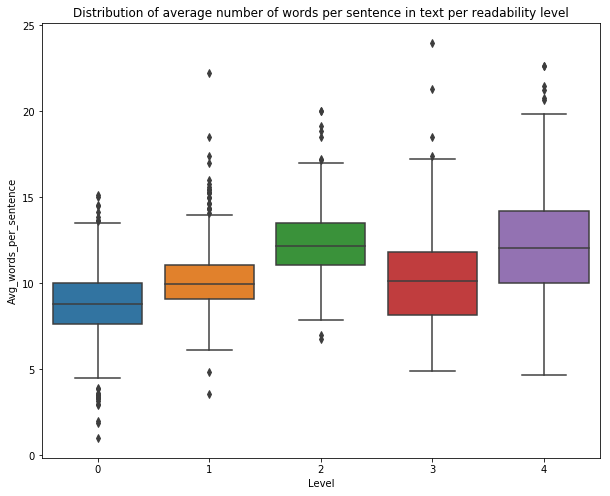

In [7]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Avg_words_per_sentence", data=df)
plt.title("Distribution of average number of words per sentence in text per readability level")
plt.show()

There does seem to be a trend of more difficult levels having more words per sentence.

### 1.3. Average number of syllables per word

Let's try to analyse average number of syllables per word. It should correlate with readability level.

In [8]:
print(spearmanr(df['Level'], df['Avg_syllables_per_word'])[0])

0.28690684389518223


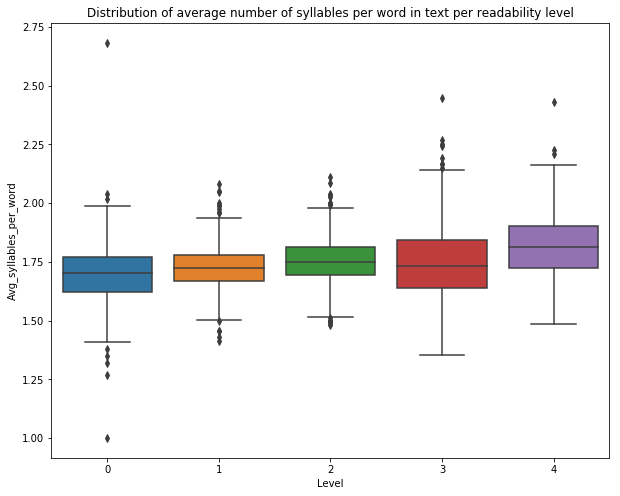

In [9]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Avg_syllables_per_word", data=df)
plt.title("Distribution of average number of syllables per word in text per readability level")
plt.show()

There is a slight trend of more difficult levels having a larger number of syllables.

### 1.4. Percentage of difficult and complex words

Difficult words are words not present in the Dale-Chall simple word list.
Complex words are polysyllables (words with more than 2 syllables).

In [10]:
print(spearmanr(df['Level'], df['Difficult_word_percent'])[0])

0.30772372170775103


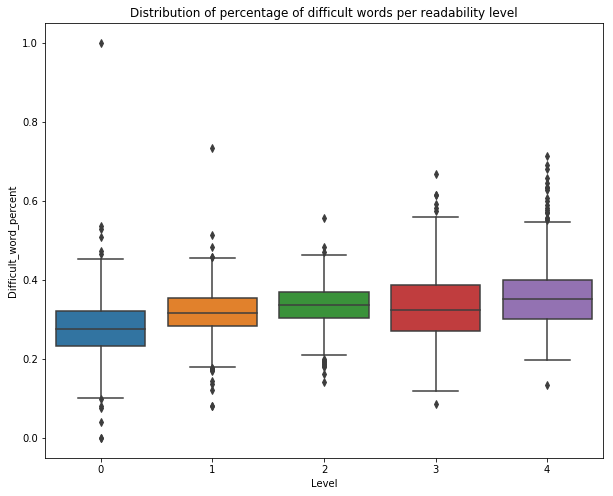

In [11]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Difficult_word_percent", data=df)
plt.title("Distribution of percentage of difficult words per readability level")
plt.show()

There seems to be a trend of more difficult readability levels having a higher percentage of difficult words.

In [12]:
print(spearmanr(df['Level'], df['Complex_word_percent'])[0])

0.33527852949864023


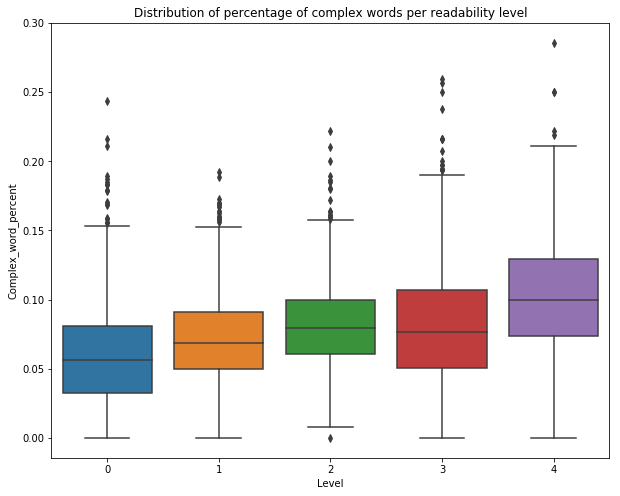

In [13]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Complex_word_percent", data=df)
plt.title("Distribution of percentage of complex words per readability level")
plt.show()

There seems to be a trend of more difficult readability levels having a higher percentage of complex words (polysyllables).

### 1.5. Percentage of long sentences and words

A sentence is long if it has more than 25 words.

In [14]:
print(spearmanr(df['Level'], df['Long_sent_percent'])[0])

0.40683488572615173


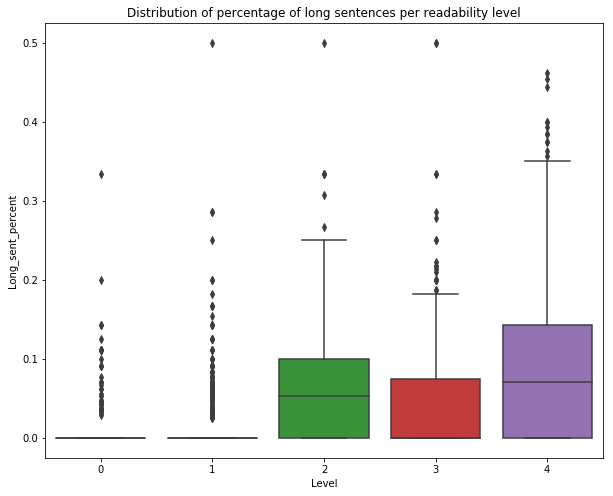

In [15]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Long_sent_percent", data=df)
plt.title("Distribution of percentage of long sentences per readability level")
plt.show()

There is a trend of more complex texts having more long sentences.

A word is long if it has more than 8 characters.

In [16]:
print(spearmanr(df['Level'], df['Long_word_percent'])[0])

0.31724356579268825


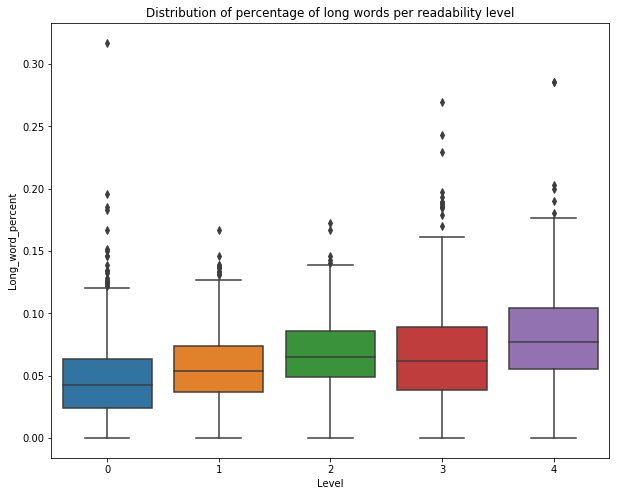

In [17]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Long_word_percent", data=df)
plt.title("Distribution of percentage of long words per readability level")
plt.show()

There is a trend of more complex texts having more long words.

### 1.6. Percentage of sentences with a comma

In [18]:
print(spearmanr(df['Level'], df['Comma_percent'])[0])

0.14727652495371457


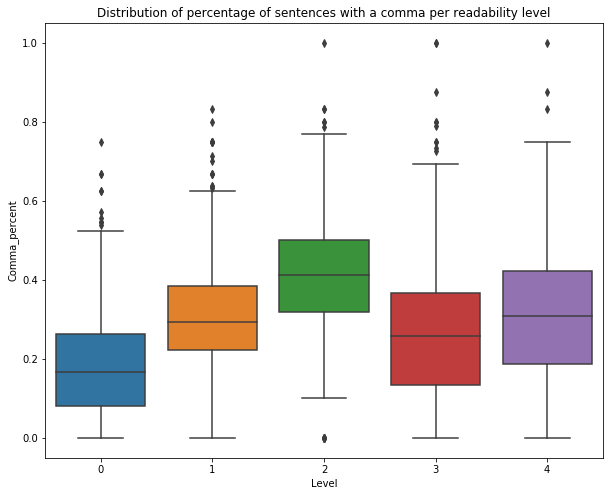

In [19]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Comma_percent", data=df)
plt.title("Distribution of percentage of sentences with a comma per readability level")
plt.show()

__We see a worrying trend here.__ Our dataset is made out two datasets, Weekly Reader and BBC BiteSize. Levels 0 to 2 are from Weekly Reader, while level 3 and 4 are from BiteSize. While we can see a trend of higher levels having more sentences with commas, we can also see the divide in our dataset.

### 1.7. Average number of letters per word

In [20]:
print(spearmanr(df['Level'], df['Avg_letters_per_word'])[0])

0.15054699944767838


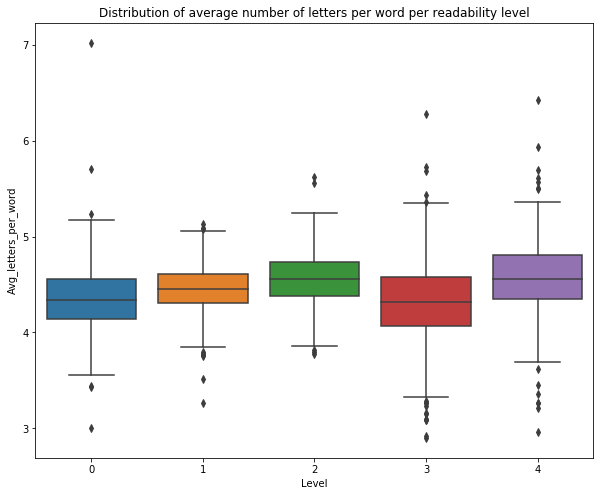

In [21]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Avg_letters_per_word", data=df)
plt.title("Distribution of average number of letters per word per readability level")
plt.show()

This feature __does not__ seem to correlate with readability level.

### 1.8 Percentage of nouns and proper nouns

In [22]:
print(spearmanr(df['Level'], df['Noun_percent'])[0])

-0.24515287870945998


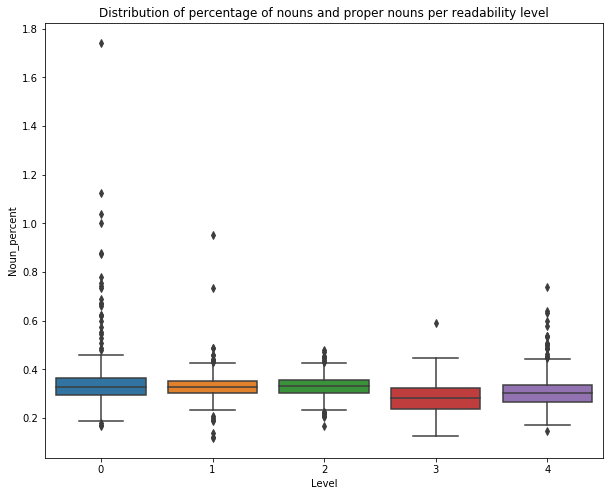

In [23]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Noun_percent", data=df)
plt.title("Distribution of percentage of nouns and proper nouns per readability level")
plt.show()

In [24]:
print(spearmanr(df['Level'], df['Proper_noun_percent'])[0])

-0.2011948174253469


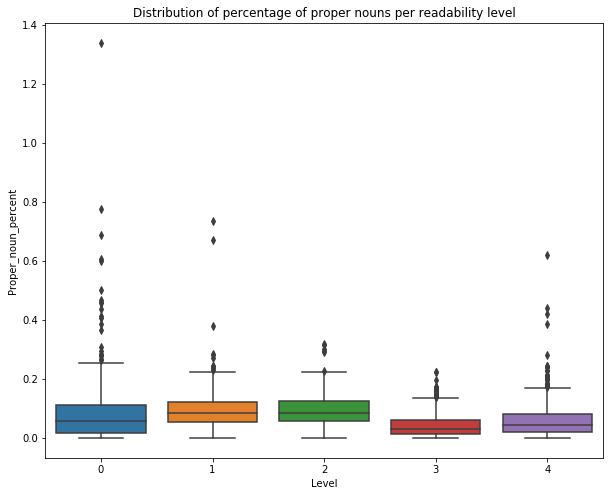

In [25]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Proper_noun_percent", data=df)
plt.title("Distribution of percentage of proper nouns per readability level")
plt.show()

There is a slight trend of less readable texts having less proper nouns.

### 1.9 Percentage of pronouns

In [26]:
print(spearmanr(df['Level'], df['Pronoun_percent'])[0])

0.04696344563508864


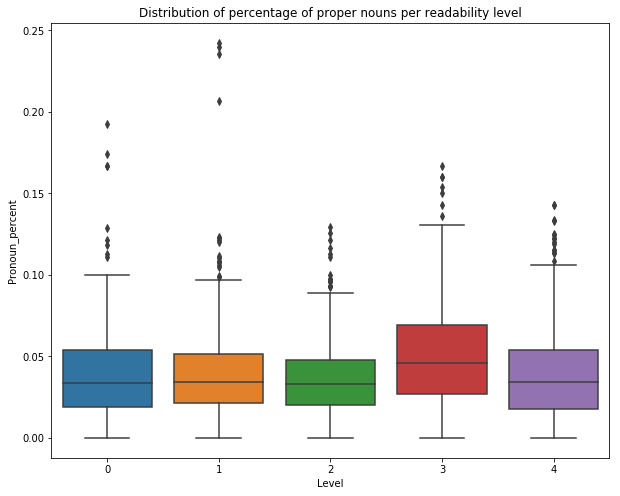

In [27]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Pronoun_percent", data=df)
plt.title("Distribution of percentage of proper nouns per readability level")
plt.show()

This feature does not seem to correlate with readability level.

### 1.10 Percentage of conjunctions

In [28]:
print(spearmanr(df['Level'], df['Conj_percent'])[0])

0.3765276938551513


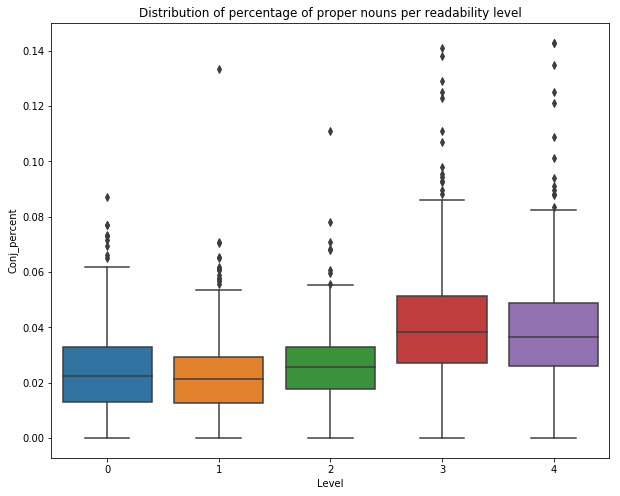

In [29]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Conj_percent", data=df)
plt.title("Distribution of percentage of proper nouns per readability level")
plt.show()

There is a trend of less readable text having a higher percentage of conjunctions.

## 2. Non-classic features

Non-classic features are features which require deep parsing of the text. They use properties of the parse tree.

### 2.1 Number of noun phrases (NPs), verb phrases (VPs) and prepositional phrases(PPs) per sentence

In [30]:
print(spearmanr(df['Level'], df['NP_per_sent'])[0])

0.2634275282122703


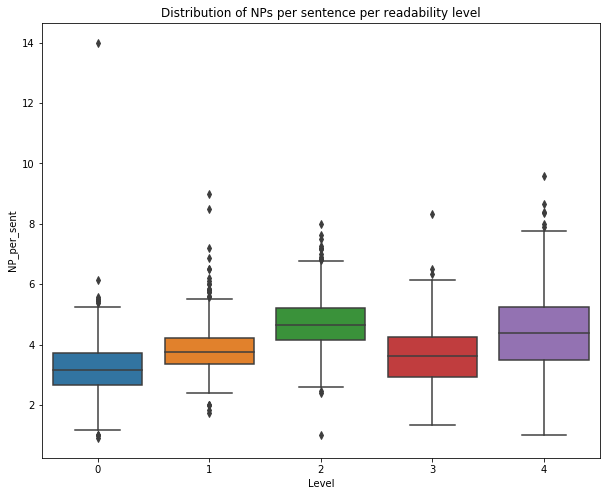

In [31]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="NP_per_sent", data=df)
plt.title("Distribution of NPs per sentence per readability level")
plt.show()

In [32]:
print(spearmanr(df['Level'], df['VP_per_sent'])[0])

0.2712775678118832


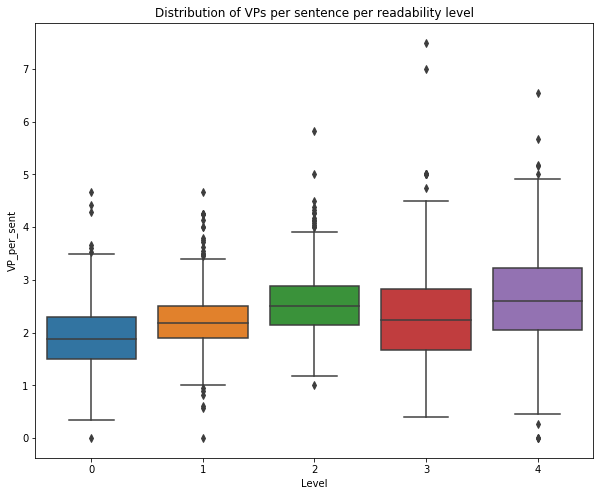

In [33]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="VP_per_sent", data=df)
plt.title("Distribution of VPs per sentence per readability level")
plt.show()

In [34]:
print(spearmanr(df['Level'], df['PP_per_sent'])[0])

0.3457325970533207


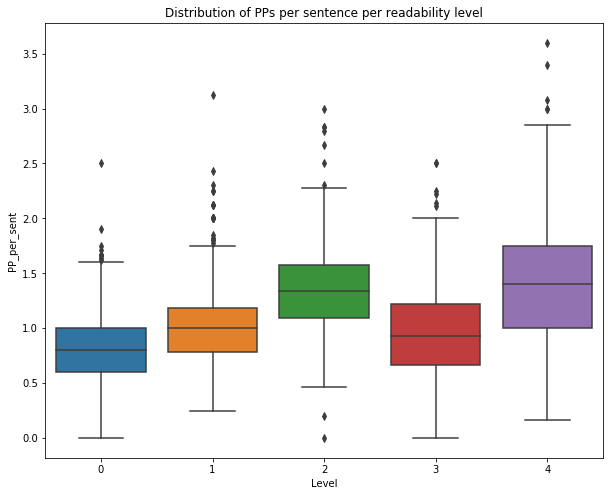

In [35]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="PP_per_sent", data=df)
plt.title("Distribution of PPs per sentence per readability level")
plt.show()

The is a slight correlation of all of these features with the readability level.

### 2.2 Number of SBARs (subordinate clauses) and SBARQs (direct question introduced by wh-element) per sentence 

In [36]:
print(spearmanr(df['Level'], df['SBAR_per_sent'])[0])

0.20536330857262824


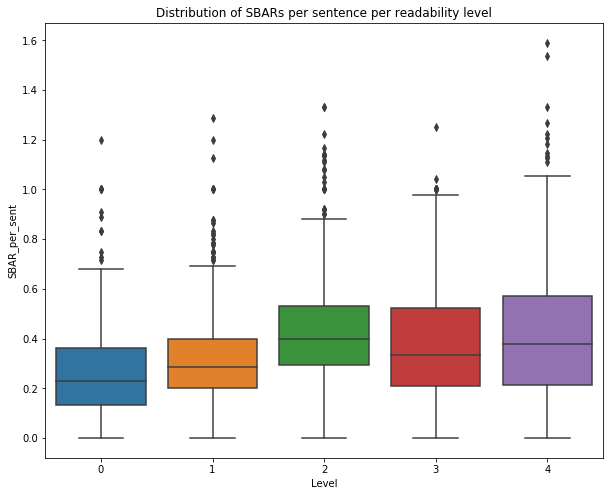

In [37]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="SBAR_per_sent", data=df)
plt.title("Distribution of SBARs per sentence per readability level")
plt.show()

In [38]:
print(spearmanr(df['Level'], df['SBARQ_per_sent'])[0])

-0.25345158569128357


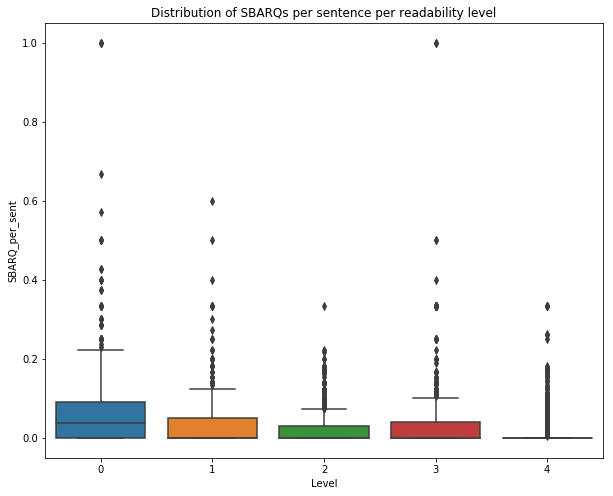

In [39]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="SBARQ_per_sent", data=df)
plt.title("Distribution of SBARQs per sentence per readability level")
plt.show()

The is a slight correlation of these features with the readability level.

### 2.3 Average length of a NP, VP and PP

In [40]:
print(spearmanr(df['Level'], df['avg_NP_size'])[0])

0.2986533016111239


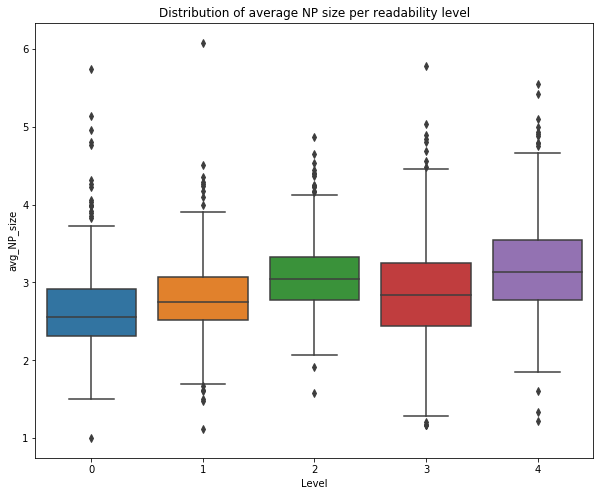

In [41]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="avg_NP_size", data=df)
plt.title("Distribution of average NP size per readability level")
plt.show()

In [42]:
print(spearmanr(df['Level'], df['avg_VP_size'])[0])

0.3305567401231252


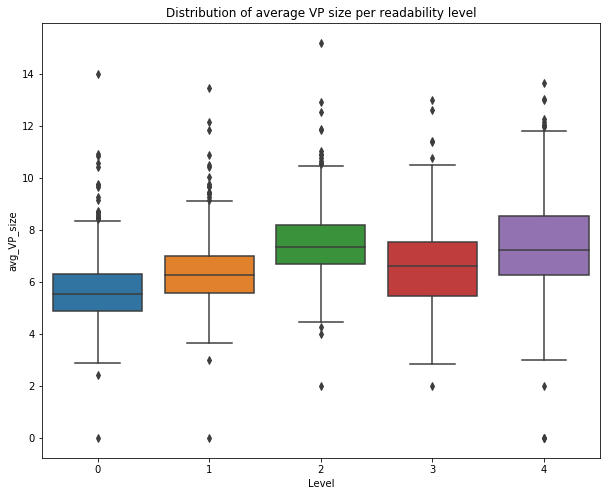

In [43]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="avg_VP_size", data=df)
plt.title("Distribution of average VP size per readability level")
plt.show()

In [44]:
print(spearmanr(df['Level'], df['avg_PP_size'])[0])

0.23543723048722415


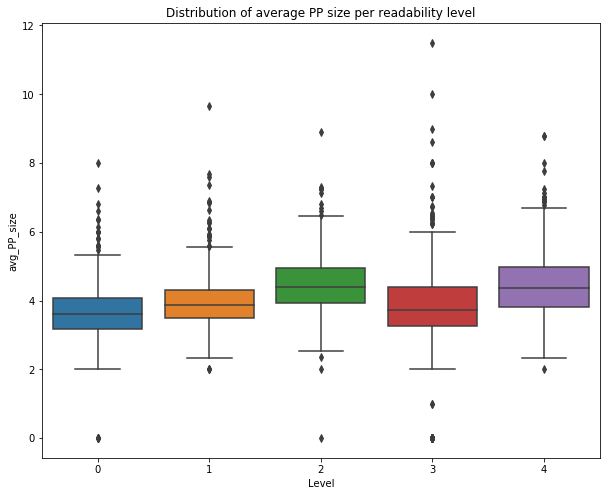

In [45]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="avg_PP_size", data=df)
plt.title("Distribution of average PP size per readability level")
plt.show()

The is a slight correlation of these features with the readability level.

### 2.4 Average height of a parse tree

In [46]:
print(spearmanr(df['Level'], df['avg_parse_tree'])[0])

0.24303329253697104


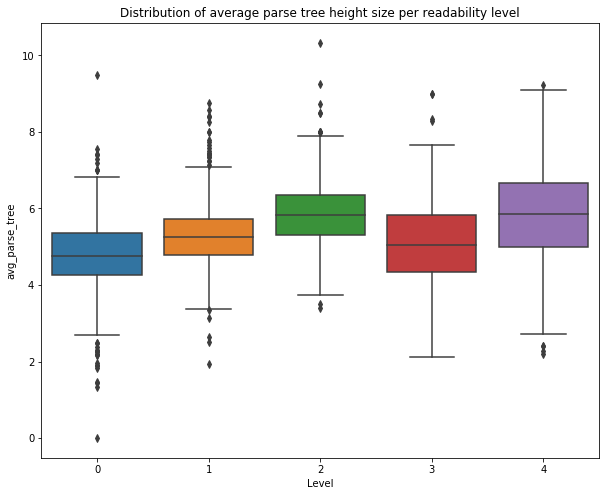

In [47]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="avg_parse_tree", data=df)
plt.title("Distribution of average parse tree height size per readability level")
plt.show()

The is a slight correlation of this feature with the readability level.